In [9]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [4]:
''' 
  시설구분 별로 색상 설정하기
     구립,국립 : green
     사립 : red
     그외 : blue
'''
df = pd.read_csv("data/Library.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고유번호    123 non-null    int64  
 1   구명      123 non-null    object 
 2   법정동명    123 non-null    object 
 3   산지여부    123 non-null    int64  
 4   주지번     123 non-null    int64  
 5   부지번     123 non-null    object 
 6   새주소명    123 non-null    object 
 7   시설명     123 non-null    object 
 8   운영기관    123 non-null    object 
 9   설립주체    123 non-null    object 
 10  시설구분    123 non-null    object 
 11  개관일     123 non-null    object 
 12  면적      123 non-null    float64
 13  홈페이지주소  123 non-null    object 
 14  연락처     123 non-null    object 
 15  생성일     123 non-null    object 
 16  경도      123 non-null    float64
 17  위도      123 non-null    float64
dtypes: float64(3), int64(3), object(12)
memory usage: 17.4+ KB


In [5]:
#시설구분의 데이터를 조회하기
df.시설구분.unique()

array(['구립도서관', '교육청도서관', '국립도서관', '사립도서관', '장애인도서관'], dtype=object)

In [6]:
#시설구분의 데이터의 건수 조회하기
df.시설구분.value_counts()

시설구분
구립도서관     83
교육청도서관    21
장애인도서관     9
사립도서관      7
국립도서관      3
Name: count, dtype: int64

In [16]:
library_map = folium.Map(location=[37.55,126.98],zoom_start=12)

for name,lat,lng,kbn in zip(df.시설명,df.위도,df.경도,df.시설구분) :
    
    if kbn == '구립도서관' or kbn == '국립도서관' :
        color = "green"
    elif kbn == '사립도서관' :    
        color = "red"
    else :
        color = "blue"
    
    folium.Marker ([lat,lng],popup=name, tooltip=kbn,
                   icon=folium.Icon(color=color,icon='bookmark')
    ).add_to(library_map)

library_map.save("library3.html")


In [18]:
#MarkerCluster 기능 
#  지도 확대 정도에 따라 마커 표시를 그룹으로 출력 기능
from folium.plugins import MarkerCluster
library_map = folium.Map(location=[37.55,126.98],zoom_start=12)
mc = MarkerCluster()
''' 
df.iterrows() : 행 전체를 묶어 리스트 형태로 저장
                반복문에서 사용시 순서,레코드값을 리턴
    _ : 순서. 여기서는 변수를 사용하지 않음으로 _ 변수에 저장함            
    row : df 데이터의 한개의 행
'''
for _,row in df.iterrows() :
    mc.add_child(
        folium.Marker(location=[row['위도'],row['경도']],
                      popup=row['시설구분'],
                      tooltip=row['시설명']
        )
    )

library_map.add_child(mc)
library_map.save("library4.html")

In [19]:
#경기도의 인구 데이터와 위치 정보를 이용하여 지도에 인구를 표시하기
import pandas as pd
import folium
import json
df=pd.read_excel("data/경기도인구데이터.xlsx",index_col='구분')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 수원시장안구 to 양평군
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2007    44 non-null     int64
 1   2008    44 non-null     int64
 2   2009    44 non-null     int64
 3   2010    44 non-null     int64
 4   2011    44 non-null     int64
 5   2012    44 non-null     int64
 6   2013    44 non-null     int64
 7   2014    44 non-null     int64
 8   2015    44 non-null     int64
 9   2016    44 non-null     int64
 10  2017    44 non-null     int64
dtypes: int64(11)
memory usage: 4.1+ KB


In [20]:
df.columns

Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

In [21]:
#컬럼 데이터의 자료형을 문자열형으로 변경
df.columns = df.columns.map(str)
df.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [22]:
#2. 위치정보 데이터읽기 
#  json : {키 : 값,...} 형태의 데이터
geo_data=json.load\
    (open("data/경기도행정구역경계.json",encoding="utf-8"))
type(geo_data)

dict

In [24]:
df.index

Index(['수원시장안구', '수원시권선구', '수원시팔달구', '수원시영통구', '성남시수정구', '성남시중원구', '성남시분당구',
       '의정부시', '안양시만안구', '안양시동안구', '부천시원미구', '부천시소사구', '부천시오정구', '광명시', '평택시',
       '동두천시', '안산시상록구', '안산시단원구', '고양시덕양구', '고양시일산동구', '고양시일산서구', '과천시',
       '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시처인구', '용인시기흥구',
       '용인시수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시',
       '연천군', '가평군', '양평군'],
      dtype='object', name='구분')

In [23]:
#3. 지도에 표시하기
g_map = folium.Map(location=[37.5502,126.982],zoom_start=9)
year='2017'
folium.Choropleth(geo_data=geo_data,  #위치 정보를 가진 딕셔너리 데이터
                  data = df[year],    #표시 데이터
                  columns = [df.index,df[year]], #지역명:데이터
                  fill_color="YlOrRd", #채워질 색상맵. 데이터의 값에 따라 색상 설정
                  fill_opacity=0.7,  #내부 투명도
                  line_opacity=0.3,  #경계 투명도
                  #색상으로 표시될 데이터의 범위 지정
                  threshold_scale=[10000,100000,200000,300000,400000,500000,600000,700000],
                  key_on="feature.properties.name",  #데이터와 지도표시될 지역부분을 연결 값 설정
).add_to(g_map)
g_map.save("경기1_"+year+".html")

In [30]:
#남양주시, 화성시 데이터 조회하기
#df.loc["남양주시"]["2017"]
#df.loc["화성시"]
#df.loc[["화성시"]]
df.loc[["남양주시","화성시"]]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
남양주시,492347,505867,525211,564141,578485,599539,618305,636256,653454,662154,665321
화성시,371972,449354,491528,505838,516765,525490,530251,540862,596525,640890,691086


In [35]:
state_geo = "data/us-states.json"  #문자열. 파일위치정보를 가진 문자열
state_unemployment = "data/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)  #지도에 표시할 데이터읽기
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Unemployment  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes


In [36]:
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [34]:
m = folium.Map(location=[48, -102], zoom_start=3)  #m : 지도 데이터만 저장
folium.Choropleth(
    state_geo,  #문자열. 파일의 위치.data/us-states.json
    data=state_data,  #화면에 표시할 데이터
    columns=["State", "Unemployment"],
    key_on="feature.id", #데이터와 지도 위치 연결 컬럼
    fill_color="YlGn", 
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)", #색상맵 아래에 표시되는 범례 데이터
).add_to(m)
m.save('usa1.html')


In [37]:
######## numpy 
# 행렬,통계관련 기본함수, 배열 기능 제공하는 모듈
import numpy as np

In [39]:
#배열 생성하기
np.arange(15)  #0~14까지의 숫자를 1차원 배열로 생성
a=np.arange(15).reshape(3,5) #0~14까지의 값을 3행5열의 2차원 배열로 생성
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [46]:
print("a의 자료형",type(a))
print("a의 형태",a.shape)  #(3, 5) : 2차원배열
print("np.arange(15) 의 형태",np.arange(15).shape) #(15,) : 1차원 배열
print("a 배열의 차수:",a.ndim)
print("np.arange(15) 의 차수:",np.arange(15).ndim)
print("a 배열의 요소의 갯수:",a.size)
print("a 배열의 요소의 자료형의 바이트 크기:",a.itemsize)


a의 자료형 <class 'numpy.ndarray'>
a의 형태 (3, 5)
np.arange(15) 의 형태 (15,)
a 배열의 차수: 2
np.arange(15) 의 차수: 1
a 배열의 요소의 갯수: 15
a 배열의 요소의 자료형의 바이트 크기: 8


In [49]:
#리스트로 배열 생성하기
b = np.array([6,7,8])
b
print(type(b))
print(type([6,7,8]))

<class 'numpy.ndarray'>
<class 'list'>


In [50]:
#튜플로 배열 생성하여 c에 저장하기
c = np.array((6,7,8))
c

array([6, 7, 8])

In [51]:
#리스트로 2차원 배열 생성하기
d = np.array([[6,7,8],[1,2,3]])
d

array([[6, 7, 8],
       [1, 2, 3]])

In [52]:
#요소의 값이 0인 3행 4열 배열 e를 생성하기
e = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0]])
e

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [54]:
#zeros :요소의 값이 0인 배열 생성하기
f = np.zeros((3,4))
f
f = np.zeros(100)
f

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
#ones :요소의 값이 1인 배열 생성하기
g = np.ones(100)  #100개
g
g = np.ones((10,10)) #10행 10열
g

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [57]:
#0~9999까지의 값을 가진 배열을 100행 100열 의 배열 i를 생성하기
i = np.arange(10000).reshape(100,100)
i

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [58]:
#0~2사이의 숫자를 9개로 균등분할하여 배열 저장하기
j = np.linspace(0,2,9)
j

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [59]:
#0~9사이의 숫자를 20개로 균등분할하여 배열 저장하기
l = np.linspace(0,9,20)
l

array([0.        , 0.47368421, 0.94736842, 1.42105263, 1.89473684,
       2.36842105, 2.84210526, 3.31578947, 3.78947368, 4.26315789,
       4.73684211, 5.21052632, 5.68421053, 6.15789474, 6.63157895,
       7.10526316, 7.57894737, 8.05263158, 8.52631579, 9.        ])

In [61]:
#정수형값 1을 요소로 가진 배열 m을 생성하기
m = np.ones(10,dtype=int)
m

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
#numpy에 저장된 상수
np.pi

3.141592653589793

In [63]:
#numpy 데이터 연산
#1. 1차원 배열의 연산
a = np.array([20,30,40,50])
b = np.arange(4)
print(a,b)

[20 30 40 50] [0 1 2 3]


In [64]:
c = a - b
c

array([20, 29, 38, 47])

In [65]:
c = a + b
c

array([20, 31, 42, 53])

In [66]:
c = a ** b
c

array([     1,     30,   1600, 125000])

In [69]:
c = a < 35
c
d = b ** 2
d
e = b * 2
e

array([0, 2, 4, 6])

In [70]:
#2차원 배열의 연산
a = np.array([[1,1],[0,1]])
b = np.array([[2,0],[3,4]])
print(a)
print(b)

[[1 1]
 [0 1]]
[[2 0]
 [3 4]]


In [71]:
c = a+b
print(c)

[[3 1]
 [3 5]]


In [72]:
c = a-b  # [[1 1],[0 1]]  -  [[2 0],[3 4]]
print(c)

[[-1  1]
 [-3 -3]]


In [73]:
c = a*b  # [[1 1],[0 1]]  *  [[2 0],[3 4]]
print(c)

[[2 0]
 [0 4]]


In [74]:
#@, dot : 행렬의 곱
c = a@b  # [[1 1],[0 1]]  *  [[2 0],[3 4]]
print(c)
''' 
 [[5,4],        [[1 1]  @  [[2 0]   : [1*2 + 1*3][1*0 + 1*4]
  [3,4]]         [0 1]]    [3 4]]    [0*2 + 1*3][0*0 + 1*4]
'''

[[5 4]
 [3 4]]


In [75]:
c = a.dot(b)
print(c)

[[5 4]
 [3 4]]


In [77]:
#난수 : 임의의 수
rg = np.random.default_rng(1) #seed값 설정
a = rg.random((2,3))  #2행 3열의 배열
a

array([[0.51182162, 0.9504637 , 0.14415961],
       [0.94864945, 0.31183145, 0.42332645]])

In [81]:
rg = np.random.default_rng(1)
a = rg.random((2,3))
a

array([[0.51182162, 0.9504637 , 0.14415961],
       [0.94864945, 0.31183145, 0.42332645]])

In [92]:
a.sum()  #합계
a.min()  #최소값
a.max()  #최대값
a.mean() #평균
#a.median() #중간값 . 오류
a.std() #표준편차


np.float64(0.3050167130701734)

In [97]:
a

array([[0.51182162, 0.9504637 , 0.14415961],
       [0.94864945, 0.31183145, 0.42332645]])

In [99]:
#a배열의 행 중 최대값
a.max(axis=1) #행별. 컬럼의 값중 최대값
#a배열의 열 중 최대값
a.max(axis=0)


array([0.94864945, 0.9504637 , 0.42332645])

In [100]:
#a 배열의 행별 합계
a.sum(axis=1)

array([1.60644493, 1.68380735])

In [101]:
#cumsum : 누적합계
a.cumsum(axis=1)

array([[0.51182162, 1.46228532, 1.60644493],
       [0.94864945, 1.2604809 , 1.68380735]])

In [106]:
#0~9사이의 정수형 난수값을 가진 2행 2열 배열 생성하기
#randint(num) : 정수형 난수
#   0~num-1 까지의 정수의 범위 설정
#   size=(2,2) : shape
i = np.random.randint(10,size=(2,2))
j = np.random.randint(10,size=(2,2))


In [107]:
print(i)
print(j)

[[2 3]
 [6 6]]
[[7 9]
 [1 2]]


In [108]:
np.vstack((i,j)) #행 기준으로 추가하기. 열의 갯수가 같아야 함

array([[2, 3],
       [6, 6],
       [7, 9],
       [1, 2]], dtype=int32)

In [109]:
np.hstack((i,j)) #열 기준으로 추가하기. 행의 갯수가 같아야 함

array([[2, 3, 7, 9],
       [6, 6, 1, 2]], dtype=int32)

In [114]:
#배열 나누기
k = np.random.randint(10,size=(2,12))
k

array([[6, 0, 8, 0, 8, 9, 2, 1, 3, 6, 6, 2],
       [7, 4, 7, 4, 5, 5, 4, 9, 1, 3, 8, 2]], dtype=int32)

In [115]:
np.hsplit(k,3) #열을 분리 3개의 배열 분리

[array([[6, 0, 8, 0],
        [7, 4, 7, 4]], dtype=int32),
 array([[8, 9, 2, 1],
        [5, 5, 4, 9]], dtype=int32),
 array([[3, 6, 6, 2],
        [1, 3, 8, 2]], dtype=int32)]

In [116]:
np.vsplit(k,2)

[array([[6, 0, 8, 0, 8, 9, 2, 1, 3, 6, 6, 2]], dtype=int32),
 array([[7, 4, 7, 4, 5, 5, 4, 9, 1, 3, 8, 2]], dtype=int32)]

In [117]:
#k 배열의 모든 요소의 값을 100으로 변경하기
#k = 100  #k 자료형이 배열에서 k 자료형이 정수형 변경
#k
k[0,0] = 100  #한개의 값에 100값을 저장
k

array([[100,   0,   8,   0,   8,   9,   2,   1,   3,   6,   6,   2],
       [  7,   4,   7,   4,   5,   5,   4,   9,   1,   3,   8,   2]],
      dtype=int32)

In [118]:
k[0,:] = 100  #한개 행의 요소값이 100값으로 저장
k

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [  7,   4,   7,   4,   5,   5,   4,   9,   1,   3,   8,   2]],
      dtype=int32)

In [119]:
k[:] = 100  #전체 요소값이 100값으로 저장
k

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]],
      dtype=int32)

In [120]:
l = np.random.randint(10,size=(2,12))
l

array([[3, 9, 9, 4, 4, 9, 9, 0, 2, 9, 7, 3],
       [4, 0, 7, 2, 5, 5, 8, 4, 0, 1, 9, 5]], dtype=int32)

In [121]:
l[:,:] = 200
l

array([[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200],
       [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]],
      dtype=int32)

In [123]:
#0~19사이의 임의의 정수를 가진 5행 4열 배열 m을 생성하기
m=np.random.randint(20,size=(5,4))
m

array([[ 4,  0,  2, 13],
       [ 5,  7, 18, 11],
       [14, 15,  2,  3],
       [14, 15,  7, 19],
       [ 5, 15,  3,  5]], dtype=int32)

In [128]:
#m배열의 최대값 출력하기
print(m)
print("m배열의 최대값 : ",m.max())
print("m배열의 각행의 최대값 : ",m.max(axis=1))
print("m배열의 각열의 최대값 : ",m.max(axis=0))
print("m배열의 각행의 최대값의 위치 : ",m.argmax(axis=1)) #컬럼의 위치값
print("m배열의 각열의 최대값의 위치 : ",m.argmax(axis=0)) #행의 위치값



[[ 4  0  2 13]
 [ 5  7 18 11]
 [14 15  2  3]
 [14 15  7 19]
 [ 5 15  3  5]]
m배열의 최대값 :  19
m배열의 각행의 최대값 :  [13 18 15 19 15]
m배열의 각열의 최대값 :  [14 15 18 19]
m배열의 각행의 최대값의 위치 :  [3 2 1 3 1]
m배열의 각열의 최대값의 위치 :  [2 2 1 3]


In [129]:
#단위 행렬 : 대각선(행==열)셀의 값이 1인 배열
n = np.eye(10,10)
n

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [130]:
#n 배열 중 0이 아닌 요소의 위치값을 조회하기
np.nonzero(n)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [138]:
#정규분포 형태의 난수 생성하기
# 
o = np.random.normal(0,1,10000)
o
print("평균:",o.mean())
print("표준편차:",o.std())

평균: 0.006352576619938143
표준편차: 1.0083285235027755


(array([  1.,   1.,   0.,   1.,   0.,   0.,   3.,   1.,   2.,   2.,   3.,
          4.,   5.,   5.,   8.,   8.,  14.,  18.,  17.,  25.,  20.,  28.,
         32.,  36.,  51.,  60.,  45.,  87.,  68.,  77.,  94., 121., 145.,
        126., 144., 163., 204., 212., 207., 218., 291., 251., 254., 254.,
        270., 270., 267., 316., 285., 306., 323., 285., 315., 299., 319.,
        307., 266., 246., 247., 215., 215., 199., 214., 180., 151., 151.,
        121., 127., 115.,  91.,  88.,  82.,  69.,  61.,  44.,  49.,  25.,
         41.,  21.,  25.,  12.,  18.,  14.,   8.,   7.,   5.,   4.,   3.,
          4.,   6.,   1.,   1.,   0.,   1.,   2.,   0.,   1.,   1.,   0.,
          1.]),
 array([-3.86998778, -3.79211938, -3.71425098, -3.63638258, -3.55851418,
        -3.48064578, -3.40277738, -3.32490899, -3.24704059, -3.16917219,
        -3.09130379, -3.01343539, -2.93556699, -2.85769859, -2.77983019,
        -2.70196179, -2.62409339, -2.54622499, -2.46835659, -2.3904882 ,
        -2.3126198 , -2.23

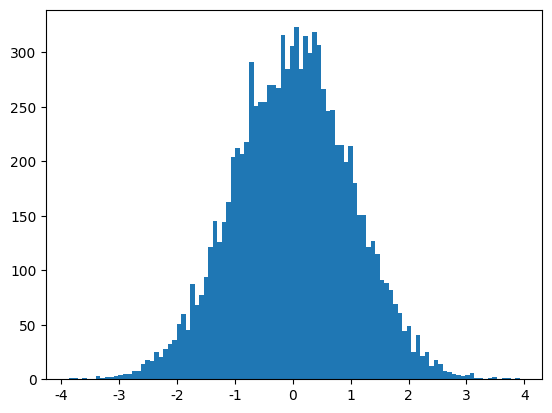

In [139]:
#히스토그램으로 o 배열의 분포를 확인하기
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.hist(o,bins=100)

평균: 2.0112962885111796
표준편차: 2.0035206131299352


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   1.,   1.,   1.,   2.,   0.,   1.,   5.,   4.,   5.,   5.,
          4.,   8.,  16.,  10.,  17.,  17.,  24.,  34.,  27.,  35.,  52.,
         47.,  50.,  64.,  79.,  88., 111., 119., 108., 134., 146., 200.,
        187., 188., 216., 220., 247., 252., 264., 318., 302., 293., 302.,
        304., 337., 312., 317., 305., 323., 329., 242., 276., 280., 229.,
        259., 230., 219., 188., 182., 147., 173., 146., 133., 128., 113.,
         91.,  77.,  74.,  63.,  66.,  43.,  28.,  26.,  27.,  20.,  13.,
         19.,  19.,  11.,  11.,  12.,   8.,   4.,   3.,   4.,   0.,   0.,
          2.]),
 array([-7.09819355, -6.93994453, -6.78169551, -6.6234465 , -6.46519748,
        -6.30694846, -6.14869944, -5.99045042, -5.8322014 , -5.67395238,
        -5.51570336, -5.35745434, -5.19920532, -5.04095631, -4.88270729,
        -4.72445827, -4.56620925, -4.40796023, -4.24971121, -4.09146219,
        -3.93321317, -3.77

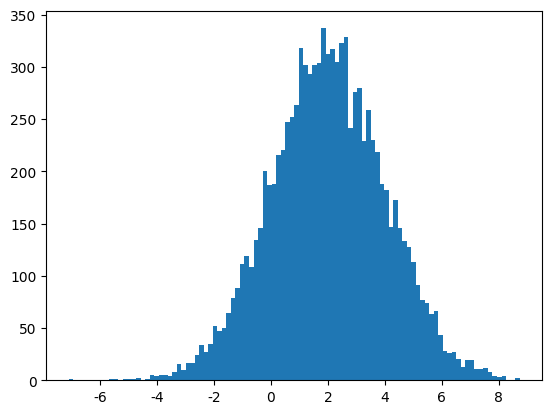

In [143]:
#평균:2, 표준편차:2인  난수 10000개를 생성하고, 히스토그램 그래프로 출력하기
p = np.random.normal(2,2,10000) #(평균,표준편차,갯수)
p
print("평균:",p.mean())
print("표준편차:",p.std())
plt.hist(p,bins=100)

In [159]:
''' 
  choice 함수 : 값을 선택
     choice(값의범위,선택갯수,재선택여부)
        choice(10,5,replace=True)
          10 : 0~9 사이의 값
          5  : 5개 선택
          replace=True/False : 재선택 가능/불가    
'''
q=np.random.choice(10,5,replace=True)
q

array([2, 8, 4, 9, 9, 1, 6, 1, 6, 9, 9], dtype=int32)

In [181]:
#1~45사이의 수를 중복없이 6개를 선택하여 lotto 변수에 저장하기
lotto = np.random.choice(45,6,replace=False) + 1 #(0~44) + 1 사이의 임의의 정수 6개 선택
lotto.sort()
lotto

array([ 3, 14, 15, 18, 25, 32], dtype=int32)

# 행정안전부 : www.mois.go.kr
-> 정책자료 -> 주민등록인구통계 -> 연령별인구현황
   -> 계:선택, 남여구분:선택안함
   -> 연령 구분 단위 : 1세
   -> 만 연령구분 : 0세 ~ 100세이상->검색버튼클릭
   -> 전체읍면동현황 선택
   -> csv파일로 다운받기 (age.csv 파일로 이름 변경)
 -- age.csv 파일 data폴더에 저장하기

In [184]:
import numpy as np
import csv
import re
f = open("data/age.csv",encoding="cp949")
data = csv.reader(f)
type(data)

_csv.reader

In [185]:
import matplotlib.pyplot as plt
name = "역삼"
for row in data :
    if row[0].find(name) >= 0 :
        print(row)

['서울특별시 강남구 역삼1동(1168064000)', '34,237', '34,237', '128', '83', '73', '69', '65', '70', '69', '70', '81', '93', '78', '115', '120', '112', '125', '116', '145', '138', '136', '172', '215', '249', '292', '473', '570', '693', '895', '959', '1,134', '1,170', '1,245', '1,280', '1,232', '1,056', '1,032', '887', '743', '757', '722', '717', '738', '706', '743', '744', '631', '581', '534', '473', '482', '464', '478', '527', '498', '495', '441', '423', '383', '351', '346', '326', '309', '349', '293', '314', '349', '291', '297', '280', '259', '266', '207', '197', '181', '147', '169', '173', '164', '179', '110', '141', '102', '113', '128', '86', '68', '69', '46', '36', '43', '38', '21', '10', '11', '10', '14', '8', '5', '4', '3', '1', '3']
['서울특별시 강남구 역삼2동(1168065000)', '36,256', '36,256', '107', '111', '124', '123', '134', '183', '222', '298', '345', '439', '464', '550', '640', '711', '611', '633', '634', '545', '502', '478', '426', '356', '347', '409', '407', '415', '523', '480', '521', '517', '

In [277]:
#pandas로 데이터 읽기
import pandas as pd
''' 
   pandas 모듈의 기본 인코딩 방식 : UTF-8 
   기본인코딩이 아닌 경우 encoding="cp949" 설정해야함
   thousands="," : 숫자데이터에 세자리마다 ,가 있는 경우 ,제거후 숫자형태로 읽음
   index_col=0 : 0번 컬럼을 인덱스로 설정

'''
df = pd.read_csv("data/age.csv", encoding="cp949",thousands=",",index_col=0)
df.head()

,2024년06월_계_총인구수,2024년06월_계_연령구간인구수,2024년06월_계_0세,2024년06월_계_1세,2024년06월_계_2세,2024년06월_계_3세,2024년06월_계_4세,2024년06월_계_5세,2024년06월_계_6세,2024년06월_계_7세,...,2024년06월_계_91세,2024년06월_계_92세,2024년06월_계_93세,2024년06월_계_94세,2024년06월_계_95세,2024년06월_계_96세,2024년06월_계_97세,2024년06월_계_98세,2024년06월_계_99세,2024년06월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9366283,9366283,37461,39642,41067,43089,45114,48661,52273,57940,...,9350,7375,5270,4361,3474,2428,1666,918,650,1511
서울특별시 종로구 (1111000000),139189,139189,385,423,480,460,543,523,605,689,...,198,163,114,89,75,56,45,24,18,43
서울특별시 종로구 청운효자동(1111051500),11190,11190,47,32,41,50,47,49,53,81,...,20,12,12,5,6,5,3,1,1,6
서울특별시 종로구 사직동(1111053000),8977,8977,19,31,42,31,39,46,52,55,...,16,10,14,8,13,2,4,2,1,6
서울특별시 종로구 삼청동(1111054000),2226,2226,4,6,7,7,6,6,13,7,...,7,6,4,5,0,2,1,0,0,2


In [278]:
df.columns

Index(['2024년06월_계_총인구수', '2024년06월_계_연령구간인구수', '2024년06월_계_0세',
       '2024년06월_계_1세', '2024년06월_계_2세', '2024년06월_계_3세', '2024년06월_계_4세',
       '2024년06월_계_5세', '2024년06월_계_6세', '2024년06월_계_7세',
       ...
       '2024년06월_계_91세', '2024년06월_계_92세', '2024년06월_계_93세', '2024년06월_계_94세',
       '2024년06월_계_95세', '2024년06월_계_96세', '2024년06월_계_97세', '2024년06월_계_98세',
       '2024년06월_계_99세', '2024년06월_계_100세 이상'],
      dtype='object', length=103)

In [279]:
#컬럼명 변경하기
col_name=["총인구수","연령구간인구수"]
for i in range(0,101) :  #i : 0~ 100 사이의 값
    col_name.append(str(i)+"세") #0세 ~ 100세
col_name


['총인구수',
 '연령구간인구수',
 '0세',
 '1세',
 '2세',
 '3세',
 '4세',
 '5세',
 '6세',
 '7세',
 '8세',
 '9세',
 '10세',
 '11세',
 '12세',
 '13세',
 '14세',
 '15세',
 '16세',
 '17세',
 '18세',
 '19세',
 '20세',
 '21세',
 '22세',
 '23세',
 '24세',
 '25세',
 '26세',
 '27세',
 '28세',
 '29세',
 '30세',
 '31세',
 '32세',
 '33세',
 '34세',
 '35세',
 '36세',
 '37세',
 '38세',
 '39세',
 '40세',
 '41세',
 '42세',
 '43세',
 '44세',
 '45세',
 '46세',
 '47세',
 '48세',
 '49세',
 '50세',
 '51세',
 '52세',
 '53세',
 '54세',
 '55세',
 '56세',
 '57세',
 '58세',
 '59세',
 '60세',
 '61세',
 '62세',
 '63세',
 '64세',
 '65세',
 '66세',
 '67세',
 '68세',
 '69세',
 '70세',
 '71세',
 '72세',
 '73세',
 '74세',
 '75세',
 '76세',
 '77세',
 '78세',
 '79세',
 '80세',
 '81세',
 '82세',
 '83세',
 '84세',
 '85세',
 '86세',
 '87세',
 '88세',
 '89세',
 '90세',
 '91세',
 '92세',
 '93세',
 '94세',
 '95세',
 '96세',
 '97세',
 '98세',
 '99세',
 '100세']

In [280]:
df.columns = col_name  #df의 컬럼명을 수정.
df.columns

Index(['총인구수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세', '5세', '6세', '7세',
       ...
       '91세', '92세', '93세', '94세', '95세', '96세', '97세', '98세', '99세', '100세'],
      dtype='object', length=103)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3909 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 100세
dtypes: int64(103)
memory usage: 3.1+ MB


In [282]:
df.count()
#fillna : 결측값이 있는 경우. 다른 값(0)으로 치환하기
df.fillna(0,inplace=True)

In [299]:
name="역삼2동"
''' 
df.index : df의 인덱스목록
str : 문자열 형태로 변경
contains(name) : name 값을 포함?
            포함: true
       없는경우 : false
'''
a = df.index.str.contains(name)
a
df2 = df[a]   #
df2  #name 값을 가진 데이터를 저장 . 역삼1동의 데이터

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 강남구 역삼2동(1168065000),36256,36256,107,111,124,123,134,183,222,298,...,14,11,15,5,5,3,2,3,0,3


In [300]:
del df2["총인구수"], df2["연령구간인구수"]

In [301]:
df2 #총인구수, 연령구간인구수 컬럼을 제거

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 강남구 역삼2동(1168065000),107,111,124,123,134,183,222,298,345,439,...,14,11,15,5,5,3,2,3,0,3


In [302]:
#인덱스의 값이 역삼1동을 포함한 경우 : True, 아닌 경우 : False
a 
#인덱스의 값이 역삼1동을 포함한 경우 : False, 아닌 경우 : True
#b :  a 값의 반대 데이터를 저장하고 있는 값
b = list(map(lambda x : not x, a))
b
df3 = df[b]
df3.head()  #역삼1동을 제외한 데이터 저장

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9366283,9366283,37461,39642,41067,43089,45114,48661,52273,57940,...,9350,7375,5270,4361,3474,2428,1666,918,650,1511
서울특별시 종로구 (1111000000),139189,139189,385,423,480,460,543,523,605,689,...,198,163,114,89,75,56,45,24,18,43
서울특별시 종로구 청운효자동(1111051500),11190,11190,47,32,41,50,47,49,53,81,...,20,12,12,5,6,5,3,1,1,6
서울특별시 종로구 사직동(1111053000),8977,8977,19,31,42,31,39,46,52,55,...,16,10,14,8,13,2,4,2,1,6
서울특별시 종로구 삼청동(1111054000),2226,2226,4,6,7,7,6,6,13,7,...,7,6,4,5,0,2,1,0,0,2


In [303]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3908 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 100세
dtypes: int64(103)
memory usage: 3.1+ MB


In [304]:
df3.head()
del df3["총인구수"],df3["연령구간인구수"]

In [305]:
df3.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),37461,39642,41067,43089,45114,48661,52273,57940,64865,67342,...,9350,7375,5270,4361,3474,2428,1666,918,650,1511
서울특별시 종로구 (1111000000),385,423,480,460,543,523,605,689,805,793,...,198,163,114,89,75,56,45,24,18,43
서울특별시 종로구 청운효자동(1111051500),47,32,41,50,47,49,53,81,83,78,...,20,12,12,5,6,5,3,1,1,6
서울특별시 종로구 사직동(1111053000),19,31,42,31,39,46,52,55,62,73,...,16,10,14,8,13,2,4,2,1,6
서울특별시 종로구 삼청동(1111054000),4,6,7,7,6,6,13,7,15,10,...,7,6,4,5,0,2,1,0,0,2


In [306]:
df2.T

행정구역,서울특별시 강남구 역삼2동(1168065000)
0세,107
1세,111
2세,124
3세,123
4세,134
...,...
96세,3
97세,2
98세,3
99세,0


In [307]:
plt.rc('font',family='Malgun Gothic') #한글 설정

In [308]:
names = list(df2.index)
names  #리스트 객체. 요소는 한개

['서울특별시 강남구 역삼2동(1168065000)']

In [309]:
names[0]
names[0][:names[0].find('(')]

'서울특별시 강남구 역삼2동'

In [310]:
names[0] = names[0][:names[0].find('(')]
df2.index = names

Text(0.5, 1.0, '역삼2동 지역의 인구구조')

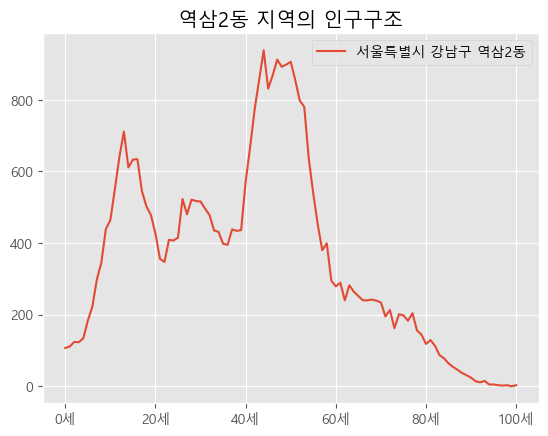

In [311]:
plt.style.use("ggplot")
df2.T.plot()
plt.title(name + " 지역의 인구구조")

In [318]:
#지정한 동과 비슷한 인구구조(비율)를 가지고 있는 동을 검색하기
df = pd.read_csv("data/age.csv",encoding="cp949",thousands=",",index_col=0)
#컬럼명 변경하기
col_name=['총인구수','연령구간인구수']
for i in range(0,101) :
    col_name.append(str(i)+'세')
col_name    
df.columns = col_name

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3909 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 100세
dtypes: int64(103)
memory usage: 3.1+ MB


In [319]:
#인구 구조 비율. 모든 컬럼의 값을 총인구수로 나누기
df = df.div(df["총인구수"],axis=0)

In [315]:
df.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.004000,0.004232,0.004385,0.004600,0.004817,0.005195,0.005581,0.006186,...,0.000998,0.000787,0.000563,0.000466,0.000371,0.000259,0.000178,0.000098,0.000069,0.000161
서울특별시 종로구 (1111000000),1.0,1.0,0.002766,0.003039,0.003449,0.003305,0.003901,0.003757,0.004347,0.004950,...,0.001423,0.001171,0.000819,0.000639,0.000539,0.000402,0.000323,0.000172,0.000129,0.000309
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.004200,0.002860,0.003664,0.004468,0.004200,0.004379,0.004736,0.007239,...,0.001787,0.001072,0.001072,0.000447,0.000536,0.000447,0.000268,0.000089,0.000089,0.000536
서울특별시 종로구 사직동(1111053000),1.0,1.0,0.002117,0.003453,0.004679,0.003453,0.004344,0.005124,0.005793,0.006127,...,0.001782,0.001114,0.001560,0.000891,0.001448,0.000223,0.000446,0.000223,0.000111,0.000668
서울특별시 종로구 삼청동(1111054000),1.0,1.0,0.001797,0.002695,0.003145,0.003145,0.002695,0.002695,0.005840,0.003145,...,0.003145,0.002695,0.001797,0.002246,0.000000,0.000898,0.000449,0.000000,0.000000,0.000898


In [320]:
#총인구수, 연령별인구수컬럼 제거
del df["총인구수"],df["연령구간인구수"]

In [321]:
df.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.004000,0.004232,0.004385,0.004600,0.004817,0.005195,0.005581,0.006186,0.006925,0.007190,...,0.000998,0.000787,0.000563,0.000466,0.000371,0.000259,0.000178,0.000098,0.000069,0.000161
서울특별시 종로구 (1111000000),0.002766,0.003039,0.003449,0.003305,0.003901,0.003757,0.004347,0.004950,0.005784,0.005697,...,0.001423,0.001171,0.000819,0.000639,0.000539,0.000402,0.000323,0.000172,0.000129,0.000309
서울특별시 종로구 청운효자동(1111051500),0.004200,0.002860,0.003664,0.004468,0.004200,0.004379,0.004736,0.007239,0.007417,0.006971,...,0.001787,0.001072,0.001072,0.000447,0.000536,0.000447,0.000268,0.000089,0.000089,0.000536
서울특별시 종로구 사직동(1111053000),0.002117,0.003453,0.004679,0.003453,0.004344,0.005124,0.005793,0.006127,0.006907,0.008132,...,0.001782,0.001114,0.001560,0.000891,0.001448,0.000223,0.000446,0.000223,0.000111,0.000668
서울특별시 종로구 삼청동(1111054000),0.001797,0.002695,0.003145,0.003145,0.002695,0.002695,0.005840,0.003145,0.006739,0.004492,...,0.003145,0.002695,0.001797,0.002246,0.000000,0.000898,0.000449,0.000000,0.000000,0.000898


In [322]:
#결측값을 0으로 치환하기
df.fillna(0,inplace=True)

In [330]:
name="가산동"
df2 = df[df.index.str.contains(name)]
df2

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 금천구 가산동(1154551000),0.00236,0.003041,0.0022,0.00232,0.00192,0.00196,0.00196,0.0022,0.00192,0.002561,...,0.00036,0.00032,0.00028,0.00008,0.00008,0.00016,0.0,0.00008,0.00008,0.00016


In [331]:
#df2.index에서 행정동코드 제거하기
names = list(df2.index)
names[0] = names[0][:names[0].find('(')]
df2.index = names
df2.index

Index(['서울특별시 금천구 가산동'], dtype='object')

<Axes: >

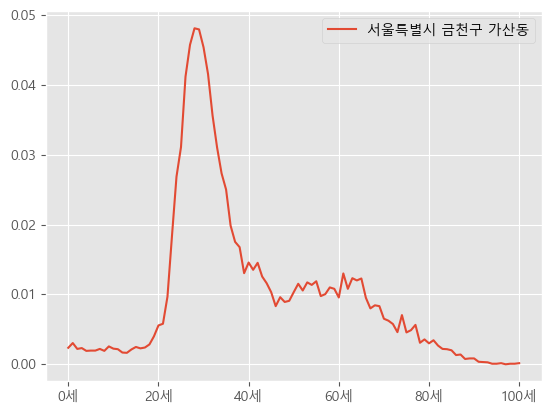

In [332]:
df2.T.plot()

In [333]:
#역삼2동을 제외한 다른 데이터를 저장하는 df3를 생성하기
a = df.index.str.contains(name)
b = list(map(lambda x : not x,a))
df3 = df[b]
df3.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.004000,0.004232,0.004385,0.004600,0.004817,0.005195,0.005581,0.006186,0.006925,0.007190,...,0.000998,0.000787,0.000563,0.000466,0.000371,0.000259,0.000178,0.000098,0.000069,0.000161
서울특별시 종로구 (1111000000),0.002766,0.003039,0.003449,0.003305,0.003901,0.003757,0.004347,0.004950,0.005784,0.005697,...,0.001423,0.001171,0.000819,0.000639,0.000539,0.000402,0.000323,0.000172,0.000129,0.000309
서울특별시 종로구 청운효자동(1111051500),0.004200,0.002860,0.003664,0.004468,0.004200,0.004379,0.004736,0.007239,0.007417,0.006971,...,0.001787,0.001072,0.001072,0.000447,0.000536,0.000447,0.000268,0.000089,0.000089,0.000536
서울특별시 종로구 사직동(1111053000),0.002117,0.003453,0.004679,0.003453,0.004344,0.005124,0.005793,0.006127,0.006907,0.008132,...,0.001782,0.001114,0.001560,0.000891,0.001448,0.000223,0.000446,0.000223,0.000111,0.000668
서울특별시 종로구 삼청동(1111054000),0.001797,0.002695,0.003145,0.003145,0.002695,0.002695,0.005840,0.003145,0.006739,0.004492,...,0.003145,0.002695,0.001797,0.002246,0.000000,0.000898,0.000449,0.000000,0.000000,0.000898


In [334]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3908 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 101 entries, 0세 to 100세
dtypes: float64(101)
memory usage: 3.0+ MB


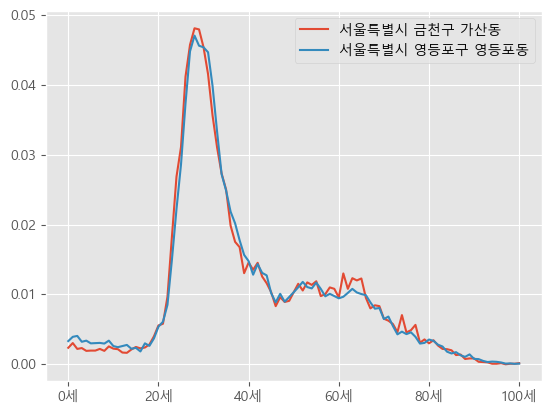

In [335]:
mn=1 #오차 최대값 초기화. 
for label,content in df3.T.items() : 
    s=sum((content - df2.iloc[0]) ** 2)  #현재레코드와 df2 데이터의 오차값의 합
    if s < mn :
        mn = s;
        result = content
        name = result.name
        result.name = name[:name.find('(')]
df2.T.plot()  #역삼2동 데이터
result.plot() #df2 데이터와 오차값이 가장 적은 데이터
plt.legend()   #범례 출력    